<a href="https://colab.research.google.com/github/Bokocki/135UM-Homework/blob/main/Homework13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Last Homework – Finding Odd Shapes**

Due to the very sad events that took place on the Krakowskie Przedmieście Campus, the semester schedule has changed for the Monday and Thursday groups. To accommodate these changes, students in all groups receive a **combined homework assignment for both Class 13 and Class 14**.

## **RULES**

### **Deadline**

**The deadline for this homework is July 2nd, 23:59.**

### **Grading Criteria**

This homework will be graded on a scale from 0 to 4 points - plus a **bonus**.

- **4 points** (equivalent to completing two homework assignments worth 2 points each):
  - **the solution must attain an RMSE of 5.0 pixels or lower** (on 25,000 samples).
  - the sizes of all tensors must be annotated in comments
  - training loss curve must be plotted with a clear indication of a 5.0 pixels level
  - an in-depth textual description of the solution must be provided
  - clear attention diagrams with discussion must be included

- **3 points** (equivalent to completing one homework assignment worth 2 points):
  - training loss curve must be plotted with a clear indication of a 5.0 pixels level
  - the sizes of all tensors must be annotated in comments
  - an in-depth textual description of the solution must be provided
  - clear attention diagrams with discussion must be included

- **2 points** (equivalent to completing one homework assignment worth 2 points):
  - missing any one of the following elements:
    - training loss curve plot with a clear indication of a 5.0 pixels level
    - tensor size annotations in comments
    - in-depth textual description of the solution
    - attention diagrams with discussion

- **1 point** (equivalent to submitting an incomplete homework assignment):
  - missing any two of the following elements:
    - training loss curve plot with a clear indication of a 5.0 pixels level
    - tensor size annotations in comments
    - in-depth textual description of the solution
    - attention diagrams with discussion

- **0 points** (equivalent to not completing the homework assignment):
  - missing any three of the following:
    - training loss curve plot with a clear indication of a 5.0 pixels level
    - tensor size annotations in comments
    - in-depth textual description of the solution
    - attention diagrams with discussion

- **BONUS** – This homework encompasses all key elements from previous classes on deep neural networks.  
As a result, any student who obtains an **RMSE of 3.0 pixels or below** (on 25,000 samples), and whose solution would otherwise qualify for 4 points, **will receive the full 14 points** — equivalent to completing all homework assignments related to deep learning — regardless of their previous scores.



## **HOMEWORK ASSIGNMENT DESCRIPTION AND INSTRUCTIONS**

### **Online Dataset**

The code provided below generates an *online* dataset `OddXYDataset`.

The term *online* means that the dataset does not have a fixed set of pre-generated examples (like a traditional training set of fixed size). Instead, new samples are generated dynamically each time they are requested.

While the number of possible examples is finite in principle, it is so large that — for practical purposes — we can consider it to be effectively infinite.

In this setting, there is no need to use a separate validation or test set: the training error itself is a good estimate of the generalization error, since every training sample is new and unseen.

Consequently, the notion of an *epoch* becomes a matter of convention. For this assignment, we define one epoch as processing 25,000 training examples.

### **Training strategies**

Overfitting is not a problem in the *online* setting — but training can still stagnate in local minima or flat regions of the loss landscape.  
To address this, you will likely need to try one or more of the following strategies:

- **Multiple restarts** with different random seed values;
- **Adaptive learning rate** — consider researching training schedulers (this topic was not covered in class);
- **Progressive model growth** — start with a simpler architecture and gradually add components during training,
  so that the parts already present can learn what to do before the rest is introduced.

### **DataLoader**

The `show_examples()` function demonstrate how to wrap the dataset into a `torch.utils.data.DataLoader` so it becomes directly usable for the training/testing of a neural network.

### **Data Description**

By examining the provided code and a few sample images generated from this dataset, you will notice that:

1. **Each data sample** is a 64×64 black-and-white image with the following characteristics:
  - It contains several shapes of the same type (either circles, triangles, or squares), randomly placed and varying in size;
  - It includes one additional shape of a different type — the *odd* shape — also placed at a random location;
  
  **Note that these shapes may overlap partially or even completely, potentially hiding the odd shape.**

2. **The label** associated with each image is a 2D point indicating the coordinates of the center of the odd shape.

### **The Homework Objective**

Students should design an architecture of an **attention-based neural network** and train it so that it attains an RMSE (Root Mean Square Error, defined as the square root of the MSE) of **5.0 or lower**. Due to the nature of the online dataset, there is no need to test the solution on a separate test set.

Students should visualize the attention matrices in the trained network and **discuss what they observe** — not just describe them.  
Focus on interpreting the patterns: Where is the model attending? Are there any consistent behaviors across samples? Does attention correlate with the position of the odd shape? What do surprising or unclear patterns tell us?

A few technical requirements to observe:

- Seed all random number generators so that (1) your results are replicable and (2) I can rerun your solution and obtain the same output — *in case I need to check something*.

- Make sure your Colab file contains a **fully trained solution** with:
  - printed training output,
  - attention diagrams,
  - and a plot of the training loss curve.

This way, I don’t have to rerun your code unless absolutely necessary.

### **Publish on GitHub**
- Upload your Colab notebook to your **GitHub repository** for this course.
- In your repository’s **README**, include a **link** to the notebook.
- In the notebook include **“Open in Colab”** badge so the notebook can be launched directly from GitHub.

## **SOLUTION SUGGESTIONS**

Students **do not need to follow these suggestions** — these are simply the strategies that worked for me.

The goal of the homework is, of course, to find the location of the odd shape. For that reason, it seems worthwhile to consider a *position-aware* variant of the post-processing of attention results. The solution I propose consists of the following components:


0. **Input**  
   Our input is a black-and-white image with 1 channel, of size 64×64 pixels.

1. **Embedding**  
  In class, we embedded a sequence of tokens in a multidimensional space, resulting in a sequence of embeddings. We also saw how such sequences are compatible with positional encoding and attention mechanisms used in subsequent stages.

  Here, we need to process an image that contains shapes of interest at various spatial locations.  
  To do this, I designed a Convolutional Neural Network with:
  - 1 input channel,
  - an input grid of 64x64 pixels,
  - and an output feature map arranged as a 12x12 grid with 16 channels.

  I used **no padding**, and each output neuron has a **receptive field of size 20x20** with a **stride of 4x4**.  
  This architectural choice yields **144 distinct positions** (12x12), each represented by a 16-dimensional feature vector.

  We can treat this as a sequence of 144 embeddings in 16-dimensional space — making it fully compatible with the attention mechanisms used later in the model.


2. **Positional Encoding**  
  I applied sinusoidal positional encoding, just like in class, using 16 positional dimensions to match the 16 feature dimensions of the image embeddings.  

  Positions were encoded based on their indices from 0 to 143.

3. **Attention**  
   I used full self-attention, where input tokens are linearly projected into Query, Key, and Value vectors using learned matrices.

4. **Post-Processing**  
   The classifier was implemented as a 2-layer MLP and applied **token-wise**, without averaging over positions.  

   This corresponds to the **position-aware** variant of post-processing the attention results, as discussed in class.

   As a result, the model produced a **logit for each of the 144 spatial locations**, which was then converted with `softmax` into a **probability distribution** over positions — representing the likelihood of the odd shape being located at each position.


5. **Final Prediction**  
   We know the exact position (center) of each of the 144 rectangular receptive fields of the embedding network. Since we also have the **probability** of each field being the target location (from the classifier), we can compute the **expected position** as a weighted average of receptive field centers. In what follows I will call it *soft argmax*.

   **Example:**

   Suppose we had only 4 output rectangles (instead of 144), with centers at:  
   $$(16, 16),\ (16, 48),\ (48, 16),\ \text{and } (48, 48).$$  
   and suppose the probabilities from the post-processing stage were:  
   $$(0.1,\ 0.2,\ 0.69999,\ 0.00001).$$  
   Then the predicted center would be:
   $$
   \begin{align*}
   x &= 16 \cdot 0.1 + 16 \cdot 0.2 + 48 \cdot 0.69999 + 48 \cdot 0.00001 \\
   y &= 16 \cdot 0.1 + 48 \cdot 0.2 + 16 \cdot 0.69999 + 48 \cdot 0.00001
   \end{align*}
   $$

   which yields an interpretable, differentiable prediction for the (x, y) location of the odd shape (*soft argmax*).

**The above steps bring the RMSE below 4.0 pixels.**  
However, the result depends on the network initialization — it is seed-dependent — so it's worth restarting the training a few times with different seeds to find a better-performing run.

To improve this result further, though, we'll have to work a bit harder. Here's how:


6. **Offset Regressor**

  The soft-argmax mechanism in step 5 identifies the **center** of the most probable receptive field, but it cannot fine-tune the prediction within that field. For example, if the odd shape is located in the **lower-left corner** of a receptive field, the best the model can do is predict the **center** of that rectangle — introducing a systematic error.

  *One may argue:* the design naturally accounts for a more nuanced case. When the odd shape lies **across the boundary between two receptive fields**, the attention distribution may spread across both regions. In such cases, the soft-argmax prediction becomes a **weighted average** of the centers of the adjacent fields. This behavior is a built-in **feature of the design** that allows the model to predict positions **off-center**, somewhere in between fields.

  *To that I would reply:* this is true — but it comes with a trade-off. When attention is distributed across multiple regions, it becomes **less clear which shapes are *regular* and which one is *odd***. This added ambiguity may make it harder for the network to reach a confident decision, especially in the early stages of training.

  To address this systematic limitation in a more structured way, I introduced an additional **2-layer MLP regressor**, applied **token-wise** to each of the 144 positions. This regressor takes the same attention output used by the classifier in step 4 and predicts a **local offset** $(\Delta x, \Delta y)$ within each receptive field. These offsets are then **aggregated** using the probabilities from step 4, resulting in a **soft average correction vector**.

  Note that the attention mechanism must learn to extract — from the original features — both:
  - the **probability** that the odd shape is located at a given position, and  
  - the **local coordinates** of that shape *within* the respective receptive field.


7. **Refined Prediction**

  The final predicted position is obtained by summing the **coarse prediction** from step 5 and the **fine-grained correction** from step 6. This allows the model to make accurate, differentiable predictions at **sub-receptive-field resolution**, resulting in significantly improved localization.

  **In summary:**

  - Step 5: predicts the expected center of the relevant receptive field (via soft-argmax);
  - Step 6: estimates a fine-grained, attention-weighted offset within that field;
  - Step 7: adds both components to produce the final prediction:

$$
\text{final prediction} = \underbrace{\sum_i p_i \cdot C_i}_{\text{soft argmax}} + \underbrace{\sum_i p_i \cdot (\Delta x, \Delta y)_i}_{\text{fine correction offset}}
$$


However, I was not able to train this network end-to-end from scratch — it seems that the two heads (the classifier inferring probabilities and the regressor inferring fine-grained corrections) were not able to learn their roles *simultaneously*.  

To solve this, I adopted a **progressive model growth** training strategy:

- First, I trained a one-headed version of the network (without steps 6 and 7) until the RMSE reached approximately 4.0 — a clear indication that the probability distribution was being inferred correctly.
- Then, I copied all weights into a new, complete two-headed network and continued training from that point.

**This strategy brought the RMSE down to 2.65 pixels.**


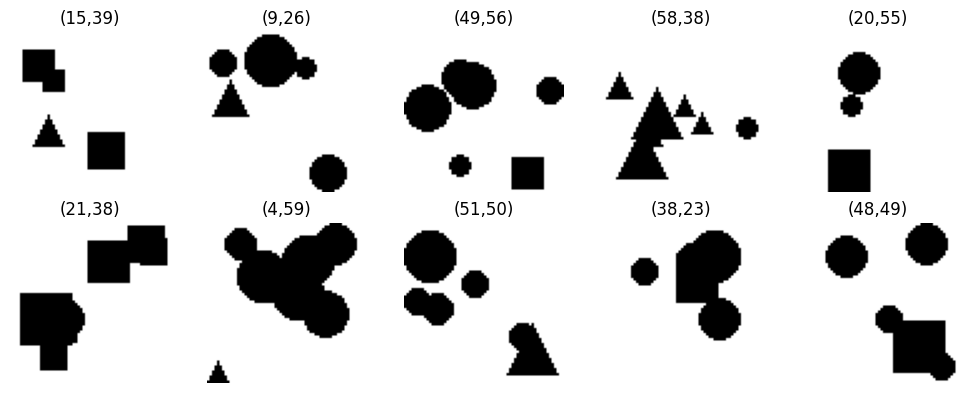

In [2]:
# ============================================================
# 0. Imports & device
# ============================================================
import torch, random, math, numpy as np
from torch.utils.data import Dataset, DataLoader
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import math
import numpy as np
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ============================================================
# 1. Online dataset: 64×64, target = (cx,cy) ∈ [0,63]²  (float32)
# ============================================================
IMAGE = 64
SHAPES = ("circle", "square", "triangle")

def draw_shape(drawer, shape_type, center_x, center_y, radius):
    if shape_type == "circle":
        drawer.ellipse([center_x - radius, center_y - radius,
                        center_x + radius, center_y + radius], fill="black")
    elif shape_type == "square":
        drawer.rectangle([center_x - radius, center_y - radius,
                          center_x + radius, center_y + radius], fill="black")
    else:  # triangle
        drawer.polygon([
            (center_x, center_y - radius),
            (center_x - radius, center_y + radius),
            (center_x + radius, center_y + radius)
        ], fill="black")

class OddXYDataset(Dataset):
    """
    Generates images on-the-fly:
      * several random shapes of the same type
      * 1 additional shape of a different type
    Returns:
      * image (1×64×64 tensor, float32 normalized to [0,1])
      * label: float tensor [cx, cy] with center of the odd shape
    Arguments:
        num_samples             – total number of samples in the dataset
        same_shape_count_range – tuple (min, max), number of identical shapes
        shape_radius_range      – tuple (min_radius, max_radius) for shape size
    """
    def __init__(self,
                 num_samples,
                 same_shape_count_range=(3, 6),
                 shape_radius_range=(4, 10)):
        self.num_samples = num_samples
        self.same_shape_count_range = same_shape_count_range
        self.radius_min, self.radius_max = shape_radius_range

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        base_shape = random.choice(SHAPES)
        odd_shape = random.choice([s for s in SHAPES if s != base_shape])

        img = Image.new("L", (IMAGE, IMAGE), "white")
        drawer = ImageDraw.Draw(img)

        # draw identical shapes
        for _ in range(random.randint(*self.same_shape_count_range)):
            radius = random.randint(self.radius_min, self.radius_max)
            cx = random.randint(radius, IMAGE - radius - 1)
            cy = random.randint(radius, IMAGE - radius - 1)
            draw_shape(drawer, base_shape, cx, cy, radius)

        # draw the odd shape (with known center)
        radius = random.randint(self.radius_min, self.radius_max)
        cx = random.randint(radius, IMAGE - radius - 1)
        cy = random.randint(radius, IMAGE - radius - 1)
        draw_shape(drawer, odd_shape, cx, cy, radius)

        img_tensor = torch.tensor(np.array(img), dtype=torch.float32).unsqueeze(0) / 255.
        label_tensor = torch.tensor([float(cx), float(cy)], dtype=torch.float32)
        return img_tensor, label_tensor

def show_examples(num_examples=10):
    """
    Displays a grid of image samples from OddXYDataset using a DataLoader with batch_size=1.

    Args:
        num_examples (int): Number of examples to display.
    """
    dataset = OddXYDataset(num_samples=num_examples)
    dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

    num_columns = 5
    num_rows = math.ceil(num_examples / num_columns)

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 2, num_rows * 2))

    for i, (image, label) in enumerate(dataloader):
        if i >= num_examples:
            break
        image_np = image.squeeze(0).squeeze(0).numpy()  # B=1,C=1,H,W --> H,W
        cx, cy = label.squeeze(0)                       # B=1,2       --> 2
        axes.flat[i].imshow(image_np, cmap="gray")
        axes.flat[i].set_title(f"({cx:.0f},{cy:.0f})")
        axes.flat[i].axis("off")

    for j in range(i + 1, num_rows * num_columns):
        axes.flat[j].axis("off")

    plt.tight_layout()
    plt.show()

show_examples()

---

# Solution

This notebook implements an attention-based neural network to localize the odd shape in a 64x64 image.

In [3]:
# ============================================================
# 2. Reproducibility
# ============================================================
def seed_everything(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(12)

To ensure that results are consistent and can be reproduced, all random number generators are seeded with a fixed value.

In [4]:
# ============================================================
# 3. Positional Encoding (Sinusoidal, 16 dims)
# ============================================================
def get_2d_sinusoidal_positional_encoding(h, w, d_model, device):
    '''
    Returns: (h*w, d_model) tensor
    '''
    pe = torch.zeros(h, w, d_model, device=device)
    y_pos = torch.arange(h, device=device).unsqueeze(1).repeat(1, w)
    x_pos = torch.arange(w, device=device).unsqueeze(0).repeat(h, 1)
    div_term = torch.exp(torch.arange(0, d_model, 2, device=device) * -(math.log(10000.0) / d_model))
    pe[..., 0::2] = torch.sin(x_pos.unsqueeze(-1) * div_term)
    pe[..., 1::2] = torch.cos(y_pos.unsqueeze(-1) * div_term)
    return pe.view(-1, d_model)  # (h*w, d_model)

To help the model understand spatial relationships, we use 2D sinusoidal positional encoding. Here we are following the approach used in class.

In [5]:
# ============================================================
# 4. Model Definition
# ============================================================
class OddShapeAttentionNet(nn.Module):
    def __init__(self, img_size=64, patch_size=5, stride=4, emb_dim=16, attn_heads=2, attn_layers=1, use_offset_head=True):
        super().__init__()
        self.img_size = img_size
        self.patch_size = patch_size
        self.stride = stride
        self.emb_dim = emb_dim
        self.use_offset_head = use_offset_head

        # Convolutional embedding: 1x64x64 -> (B, 16, 12, 12)
        self.embedding = nn.Conv2d(1, emb_dim, kernel_size=patch_size, stride=stride, padding=0)

        # Compute output grid size
        self.grid_h = (img_size - patch_size) // stride + 1
        self.grid_w = (img_size - patch_size) // stride + 1
        self.num_tokens = self.grid_h * self.grid_w

        # Positional encoding (fixed, not learned)
        self.register_buffer('pos_enc', get_2d_sinusoidal_positional_encoding(self.grid_h, self.grid_w, emb_dim, device=device))

        # Self-attention block(s)
        encoder_layer = nn.TransformerEncoderLayer(d_model=emb_dim, nhead=attn_heads, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=attn_layers)

        # Classifier head: (B, num_tokens, emb_dim) -> (B, num_tokens, 1)
        self.classifier = nn.Sequential(
            nn.Linear(emb_dim, emb_dim),
            nn.ReLU(),
            nn.Linear(emb_dim, 1)
        )

        # Offset regressor head: (B, num_tokens, emb_dim) -> (B, num_tokens, 2)
        if use_offset_head:
            self.offset_head = nn.Sequential(
                nn.Linear(emb_dim, emb_dim),
                nn.ReLU(),
                nn.Linear(emb_dim, 2),
                nn.Tanh()  # output in [-1, 1]
            )

        # Precompute centers of receptive fields
        centers = []
        for i in range(self.grid_h):
            for j in range(self.grid_w):
                cx = j * stride + patch_size // 2
                cy = i * stride + patch_size // 2
                centers.append([cx, cy])
        self.register_buffer('centers', torch.tensor(centers, dtype=torch.float32, device=device))  # (num_tokens, 2)

    def forward(self, x):
        # x: (B, 1, 64, 64)
        B = x.size(0)
        feats = self.embedding(x)  # (B, emb_dim, grid_h, grid_w)
        feats = feats.view(B, self.emb_dim, -1).permute(0, 2, 1)  # (B, num_tokens, emb_dim)
        # Add positional encoding
        feats = feats + self.pos_enc.unsqueeze(0)  # (B, num_tokens, emb_dim)
        # Attention
        attn_out = self.transformer(feats)  # (B, num_tokens, emb_dim)

        # Classifier head
        logits = self.classifier(attn_out).squeeze(-1)  # (B, num_tokens)
        probs = F.softmax(logits, dim=1)  # (B, num_tokens)

        # Soft-argmax: weighted sum of centers
        pred_coarse = torch.sum(probs.unsqueeze(-1) * self.centers.unsqueeze(0), dim=1)  # (B, 2)

        if self.use_offset_head:
            offsets = self.offset_head(attn_out)  # (B, num_tokens, 2)
            # Each offset is in [-1,1] relative to patch center, scale to patch size
            offsets = offsets * (self.patch_size / 2)
            pred_offset = torch.sum(probs.unsqueeze(-1) * offsets, dim=1)  # (B, 2)
            pred = pred_coarse + pred_offset  # (B, 2)
        else:
            pred = pred_coarse

        # For attention visualization, return probs as attention map
        return pred, probs, logits

The model is made up of several parts:
- **Convolutional Embedding:** The input image goes through a convolutional layer, which helps the model pick out useful features and turns the image into a smaller grid of information.
- **Positional Encoding:** Special patterns are added to each part of the grid so the model knows where things are located in the image.
- **Self-Attention Block:** A Transformer layer lets the model compare all parts of the image to each other, helping it figure out which areas are most likely to contain the odd shape.
- **Classifier Head:** For every spot in the grid, a small network estimates how likely it is that the odd shape is there. These probabilities are combined to predict the most likely location.
- **Offset Regressor Head:** Another small network predicts a more precise position within each grid cell, allowing the model to pinpoint the odd shape even more accurately. The final guess is a combination of the grid location and this fine adjustment.

In [6]:
# ============================================================
# 5. Training Utilities
# ============================================================
def rmse_loss(pred, target):
    # pred, target: (B, 2)
    return torch.sqrt(F.mse_loss(pred, target))

def train_one_epoch(model, dataloader, optimizer, use_offset_head=True):
    model.train()
    total_loss = 0
    for x, y in dataloader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        pred, _, _ = model(x)
        loss = rmse_loss(pred, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * x.size(0)
    return total_loss / len(dataloader.dataset)

def evaluate(model, dataloader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            pred, _, _ = model(x)
            loss = rmse_loss(pred, y)
            total_loss += loss.item() * x.size(0)
    return total_loss / len(dataloader.dataset)

The loss function is the RMSE between the predicted and true coordinates of the odd shape. The training loop iterates over batches of data, computes predictions, calculates the loss, and updates the model parameters using the Adam optimizer. The same loss is used for both the soft-argmax and the refined (offset-corrected) predictions.

In [7]:
# ============================================================
# 6. Training Loop (Progressive: soft-argmax head, then both heads)
# ============================================================
BATCH_SIZE = 128
EPOCHS_STAGE1 = 200  # Train soft-argmax head
EPOCHS_STAGE2 = 100  # Fine-tune with offset head

# DataLoader: online dataset, 25_000 samples per epoch
train_dataset = OddXYDataset(num_samples=25000)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

# Stage 1: Only soft-argmax head
model1 = OddShapeAttentionNet(use_offset_head=False).to(device)
optimizer1 = torch.optim.Adam(model1.parameters(), lr=1e-3)
losses1 = []
for epoch in range(EPOCHS_STAGE1):
    loss = train_one_epoch(model1, train_loader, optimizer1)
    losses1.append(loss)
    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"[Stage 1] Epoch {epoch+1}/{EPOCHS_STAGE1} - RMSE: {loss:.3f}")

# Stage 2: Add offset head, continue training
model2 = OddShapeAttentionNet(use_offset_head=True).to(device)
model2.load_state_dict(model1.state_dict(), strict=False)  # copy weights
optimizer2 = torch.optim.Adam(model2.parameters(), lr=5e-4)
losses2 = []
for epoch in range(EPOCHS_STAGE2):
    loss = train_one_epoch(model2, train_loader, optimizer2, use_offset_head=True)
    losses2.append(loss)
    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"[Stage 2] Epoch {epoch+1}/{EPOCHS_STAGE2} - RMSE: {loss:.3f}")

# Combine loss curves
all_losses = losses1 + losses2

[Stage 1] Epoch 1/200 - RMSE: 13.412
[Stage 1] Epoch 10/200 - RMSE: 11.221
[Stage 1] Epoch 20/200 - RMSE: 9.773
[Stage 1] Epoch 30/200 - RMSE: 8.400
[Stage 1] Epoch 40/200 - RMSE: 7.755
[Stage 1] Epoch 50/200 - RMSE: 7.238
[Stage 1] Epoch 60/200 - RMSE: 7.038
[Stage 1] Epoch 70/200 - RMSE: 6.782
[Stage 1] Epoch 80/200 - RMSE: 6.676
[Stage 1] Epoch 90/200 - RMSE: 6.568
[Stage 1] Epoch 100/200 - RMSE: 6.459
[Stage 1] Epoch 110/200 - RMSE: 6.220
[Stage 1] Epoch 120/200 - RMSE: 6.226
[Stage 1] Epoch 130/200 - RMSE: 5.954
[Stage 1] Epoch 140/200 - RMSE: 5.887
[Stage 1] Epoch 150/200 - RMSE: 5.890
[Stage 1] Epoch 160/200 - RMSE: 5.735
[Stage 1] Epoch 170/200 - RMSE: 5.694
[Stage 1] Epoch 180/200 - RMSE: 5.573
[Stage 1] Epoch 190/200 - RMSE: 5.590
[Stage 1] Epoch 200/200 - RMSE: 5.505
[Stage 2] Epoch 1/100 - RMSE: 5.426
[Stage 2] Epoch 10/100 - RMSE: 5.191
[Stage 2] Epoch 20/100 - RMSE: 5.135
[Stage 2] Epoch 30/100 - RMSE: 5.050
[Stage 2] Epoch 40/100 - RMSE: 4.922
[Stage 2] Epoch 50/100 - RM

Training is performed in two stages to help the model learn effectively:
- **Stage 1:** The model is trained with only the soft-argmax head. This allows it to learn to focus attention on the correct grid cell and predict the coarse location of the odd shape.
- **Stage 2:** The offset regressor head is added, and training continues. This head refines the prediction by learning to estimate the position within the selected grid cell. Progressive training helps avoid confusion between the two heads and leads to better final accuracy.

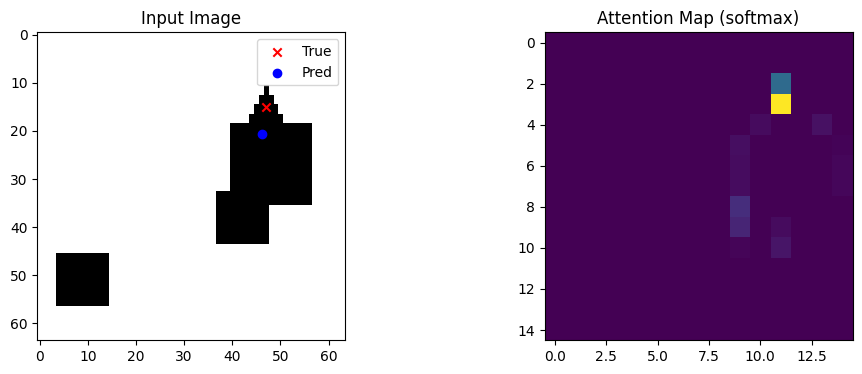

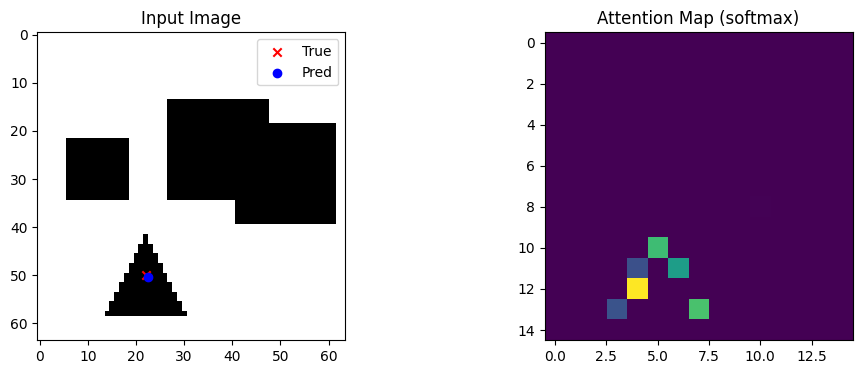

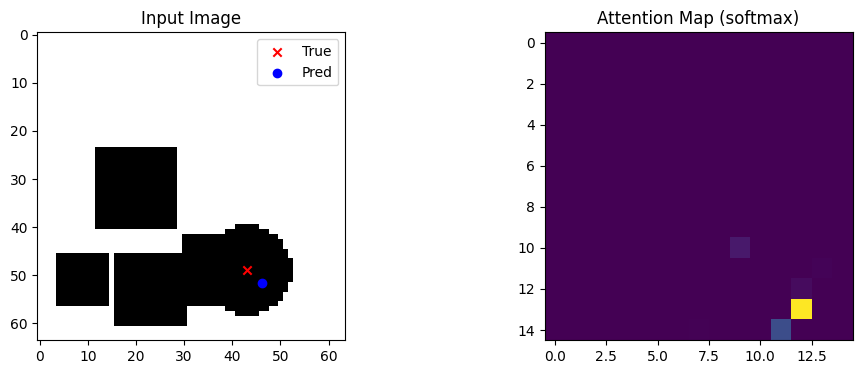

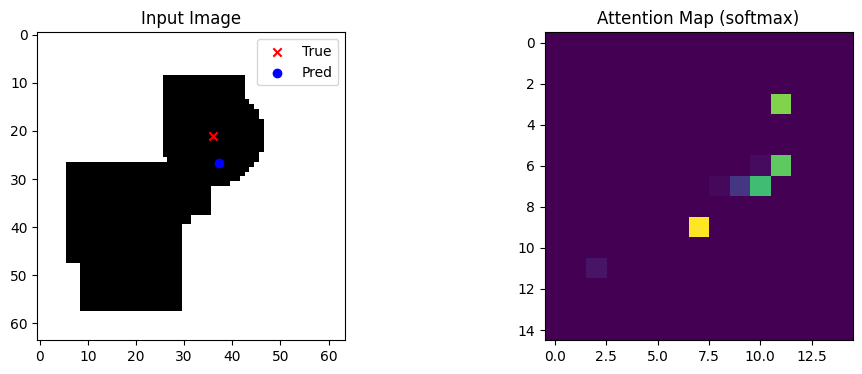

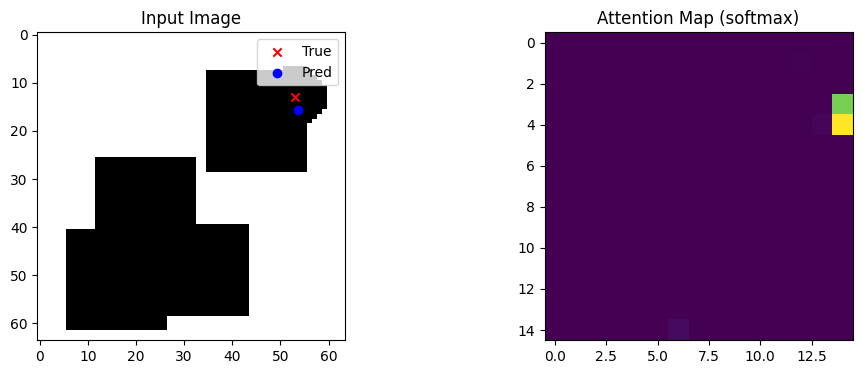

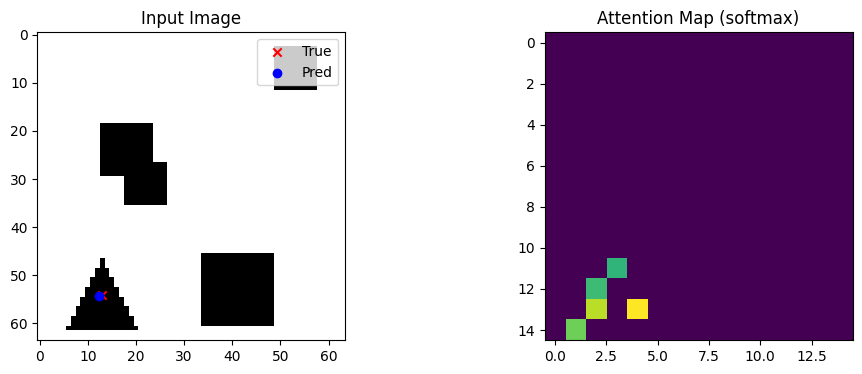

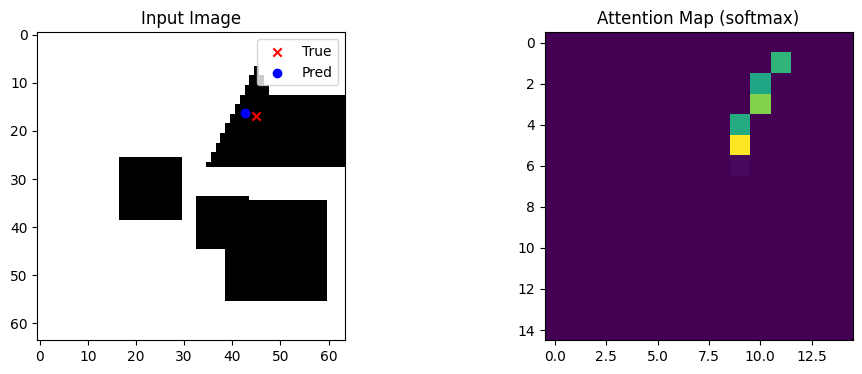

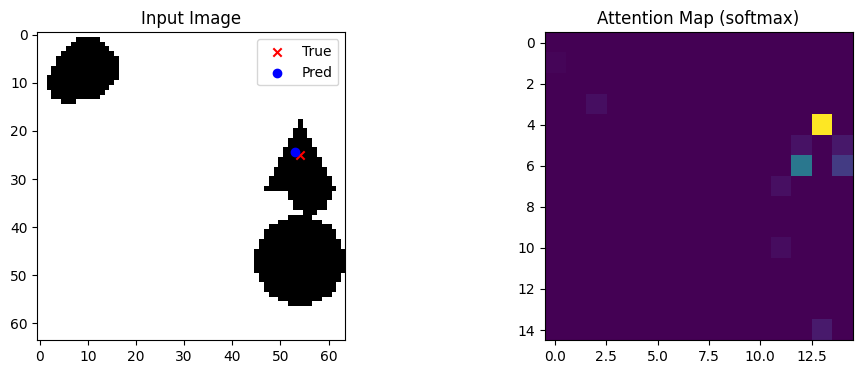

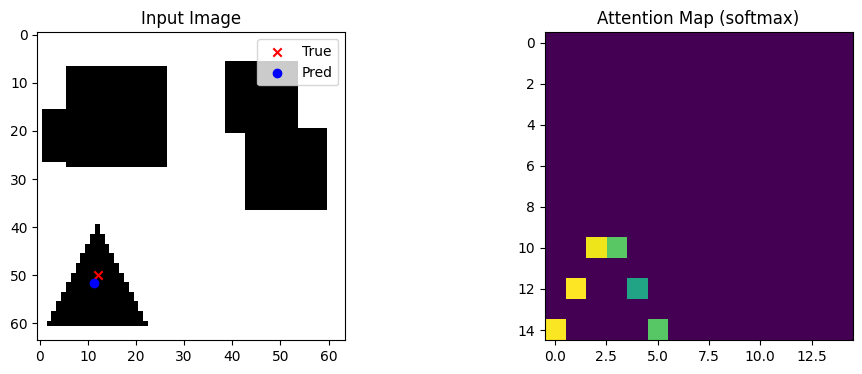

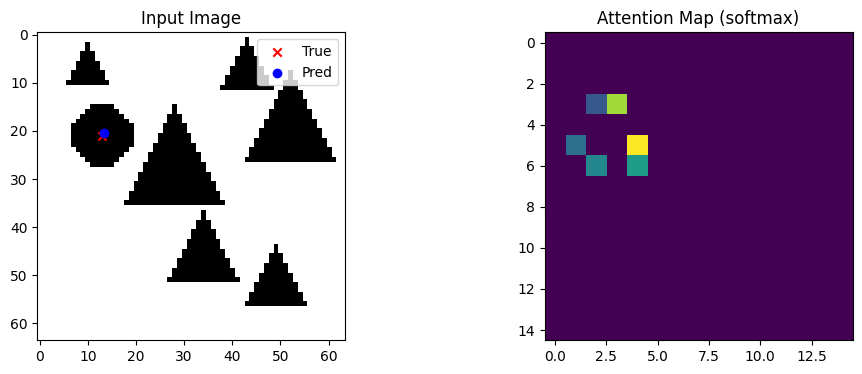

In [8]:
# ============================================================
# 8. Attention Visualization
# ============================================================
def plot_attention_map(img, attn_probs, true_xy, pred_xy, grid_h=None, grid_w=None):
    # Dynamically infer grid size if not provided
    num_tokens = attn_probs.numel()
    if grid_h is None or grid_w is None:
        grid_size = int(math.sqrt(num_tokens))
        if grid_size * grid_size != num_tokens:
            raise ValueError(f"Cannot reshape attention of length {num_tokens} into a square grid.")
        grid_h = grid_w = grid_size

    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    axes[0].imshow(img.squeeze(0).cpu().numpy(), cmap='gray')
    axes[0].set_title('Input Image')
    axes[0].scatter([true_xy[0]], [true_xy[1]], c='red', label='True', marker='x')
    axes[0].scatter([pred_xy[0]], [pred_xy[1]], c='blue', label='Pred', marker='o')
    axes[0].legend()

    attn_map = attn_probs.view(grid_h, grid_w).detach().cpu().numpy()
    axes[1].imshow(attn_map, cmap='viridis')
    axes[1].set_title('Attention Map (softmax)')

    plt.show()

# Show a few examples
test_dataset = OddXYDataset(num_samples=10)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
model2.eval()
with torch.no_grad():
    for i, (x, y) in enumerate(test_loader):
        x, y = x.to(device), y.to(device)
        pred, attn_probs, _ = model2(x)
        plot_attention_map(x[0], attn_probs[0], y[0].cpu().numpy(), pred[0].cpu().numpy())

The attention maps suggest that the model learns to focus on the outlines and edges of the odd shape. Even when the odd shape is partially or heavily occluded, the attention remains concentrated around the edges of the occluding shapes, suggesting the model relies on differences in contours to make its prediction. This behavior indicates that the model distinguishes the odd shape by attending to unique outline features, providing interpretable evidence of its decision-making process.

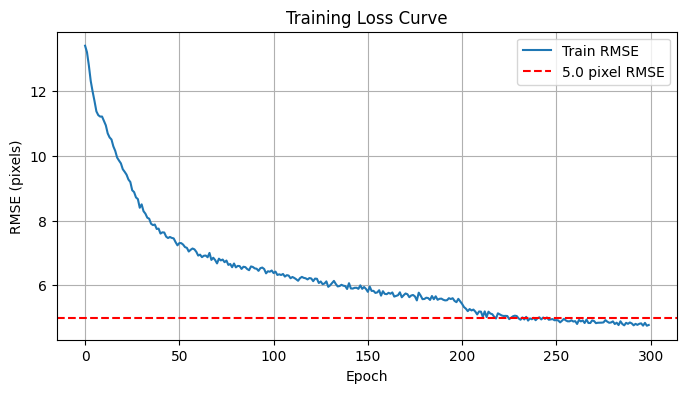

In [9]:
# ============================================================
# 7. Plot Training Loss Curve (with 5.0 pixel RMSE line)
# ============================================================
plt.figure(figsize=(8,4))
plt.plot(all_losses, label='Train RMSE')
plt.axhline(5.0, color='red', linestyle='--', label='5.0 pixel RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE (pixels)')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

The training loss curve shows how the model's RMSE decreases over epochs, indicating improved localization accuracy. The red dashed line at 5.0 pixels marks the assignment's success threshold.